In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dev = qml.device('default.qubit', wires=11)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([1,0]), wires=[6,7])
    qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.Barrier(range(11))
    
    # determination 
    qml.Toffoli([8,9,10])
    
    return qml.probs([6,7,8,9,10])

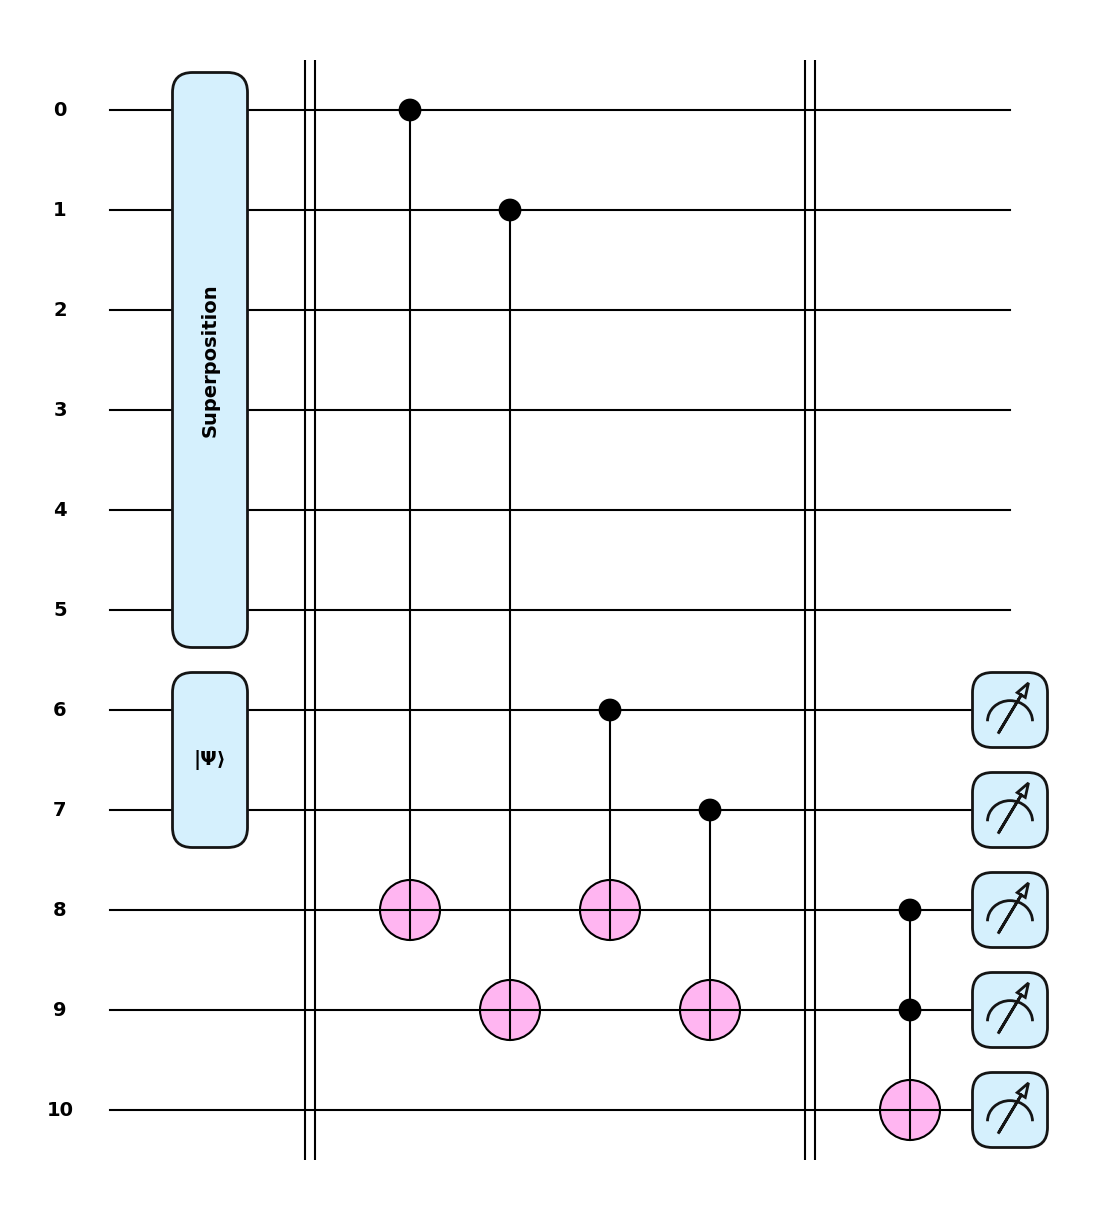

In [4]:
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

fig.savefig('LE_2d.png')

In [4]:
if np.round(p,1)[0] == 0.5: # odd parity
    # trace out the storage qubit
    dm_le =  qml.math.partial_trace(dm, [3])
else:
    # trace out the parity qubit
    dm_le = qml.math.partial_trace(dm, [4])

In [5]:
bit_strings = [f"{x:0{3}b}" for x in range(8)]
# print(bit_strings)

# new column and idex name for the 3 qubit states
df = pd.DataFrame(dm_le)
to_binary = dict(zip(range(8), bit_strings))
df = df.rename(columns=to_binary, index=to_binary)
df

,000,001,010,011,100,101,110,111
000,0.5+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
001,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
010,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
011,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
100,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
101,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.5+0.0j,0.0+0.0j,0.0+0.0j
110,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
111,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


In [6]:
df = pd.DataFrame(dm_le.diagonal()).T
bit_strings = [f"{x:0{3}b}" for x in range(8)]
to_binary = dict(zip(range(8), bit_strings))
df = df.rename(columns=to_binary)
df

,000,001,010,011,100,101,110,111
0,0.5+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.5+0.0j,0.0+0.0j,0.0+0.0j


Adaptive unitary transformation

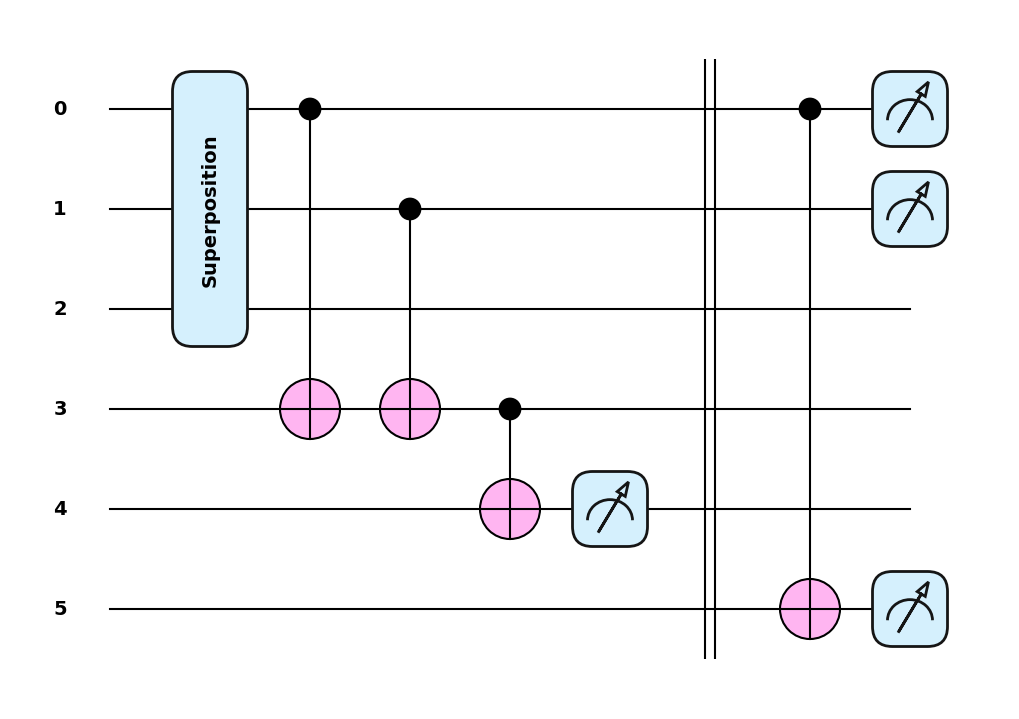

In [7]:
dev = qml.device('default.qubit', wires=6)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2], work_wire=2)
    # qml.Barrier(range(6))
    
    qml.CNOT([0,3])
    qml.CNOT([1,3])
    # qml.Barrier(range(6))
    
    # parity caopy to measure
    qml.CNOT([3,4])
    
    # measurement
    qml.measure(4)
    qml.Barrier(range(6))
    
    # take additional operations
    qml.CNOT([0,5])
    return qml.probs(5), qml.density_matrix([0,1,5])

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0],[1,1]])
plt.show()

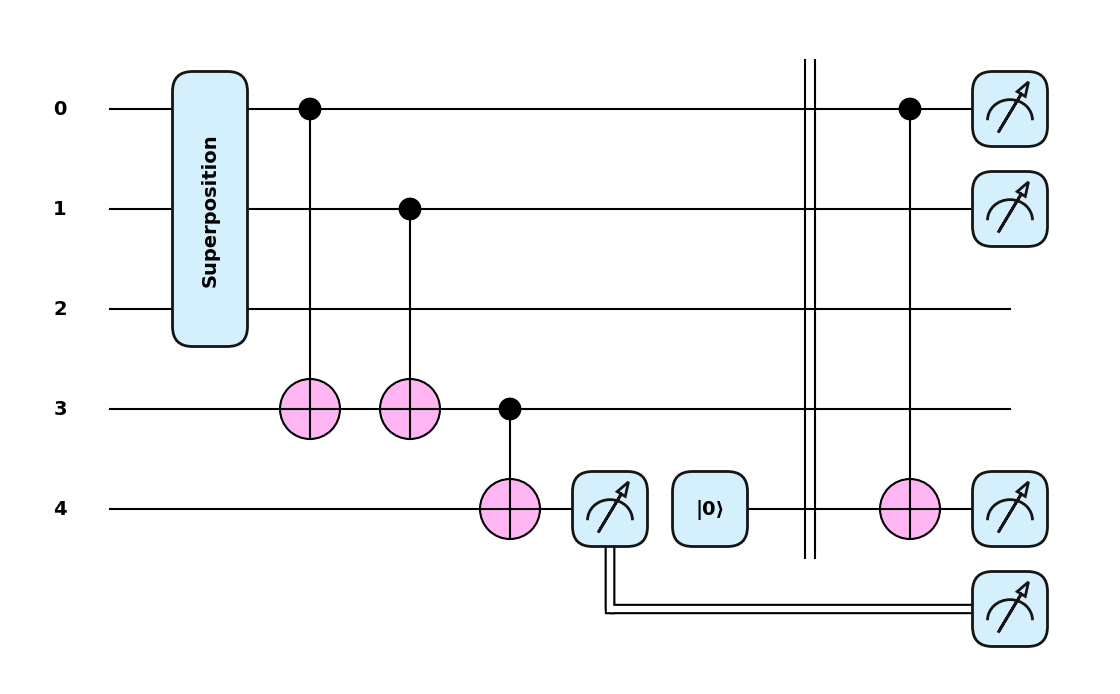

In [9]:
dev = qml.device('default.qubit', wires=5)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2], work_wire=2)
    
    qml.CNOT([0,3])
    qml.CNOT([1,3])
    
    # parity caopy to measure
    qml.CNOT([3,4])
    
    # measurement
    p = qml.measure(4, reset=True)
    qml.Barrier(range(5))
    
    # take additional operations
    qml.CNOT([0,4])
    return qml.probs(op=p), qml.density_matrix([0,1,4])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0],[1,1]])
plt.show()

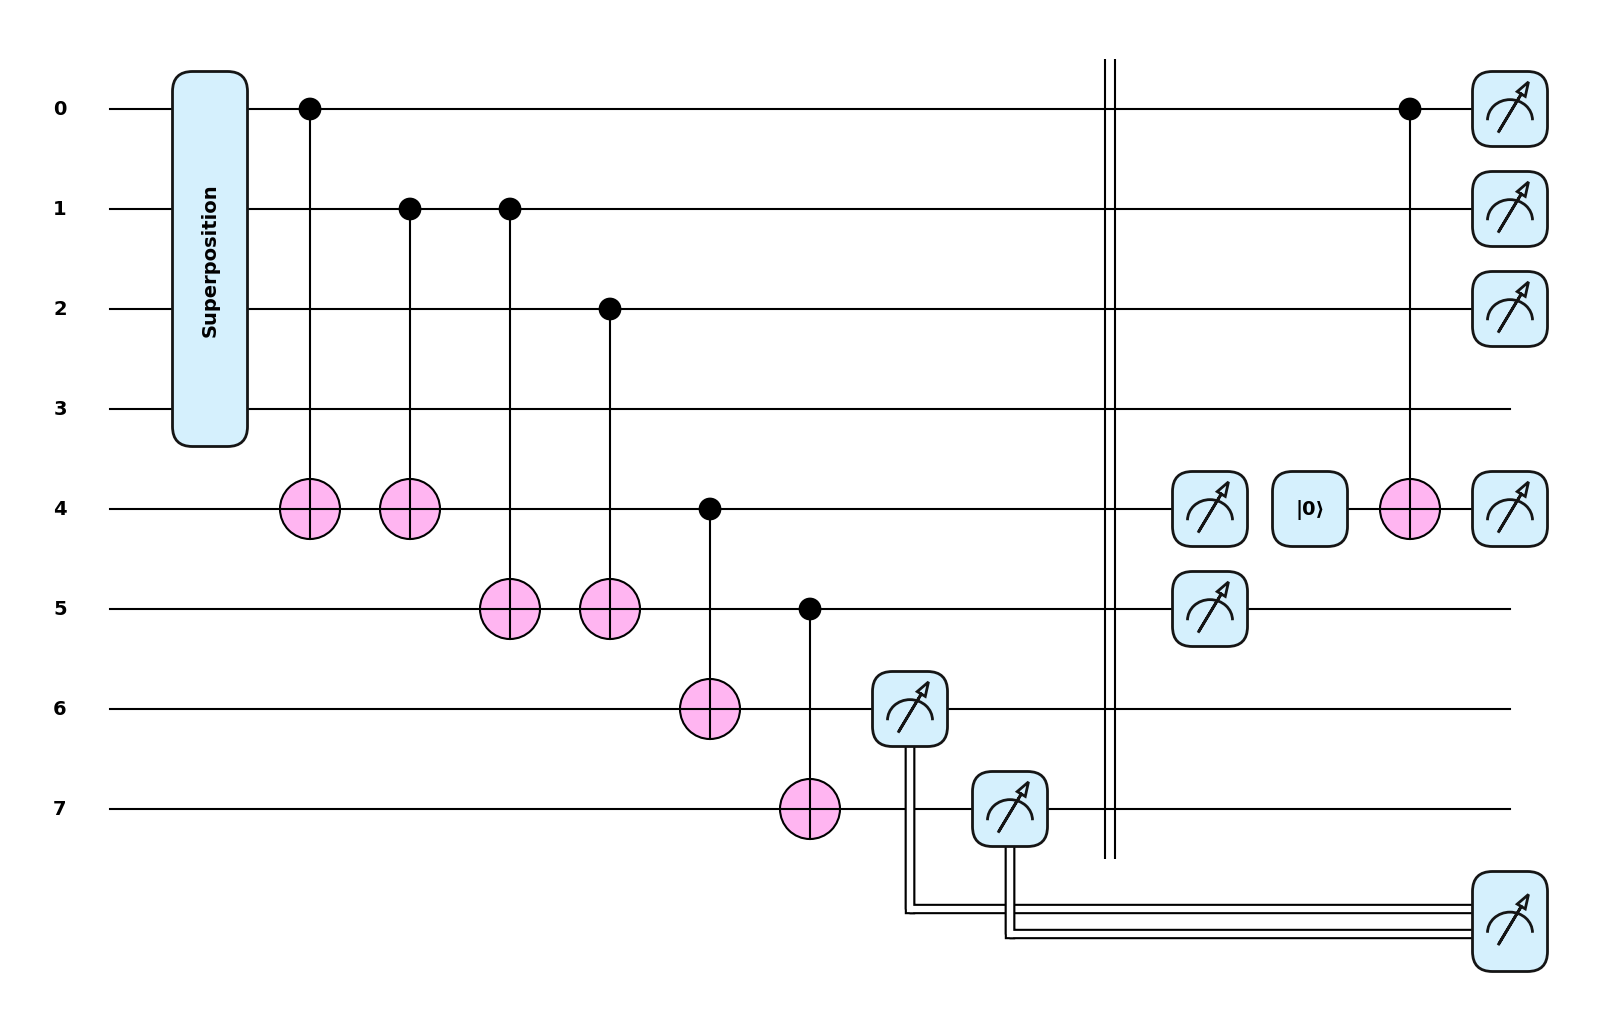

In [10]:
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2,3], work_wire=3)

    # parity
    qml.CNOT([0,4])
    qml.CNOT([1,4])
    qml.CNOT([1,5])
    qml.CNOT([2,5])
    
    # parity caopy to measure
    qml.CNOT([4,6])
    qml.CNOT([5,7])
    
    # measurement
    p_ab = qml.measure(6)
    p_bc = qml.measure(7)
    qml.Barrier(range(8))

    qml.measure(4, reset=True)
    qml.measure(5)    
    
    # take additional operations
    qml.CNOT([0,4])
    return qml.probs(op=p_ab), qml.probs(op=p_bc), qml.density_matrix([0,1,2,4])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0],[1,1,0]])
plt.show()

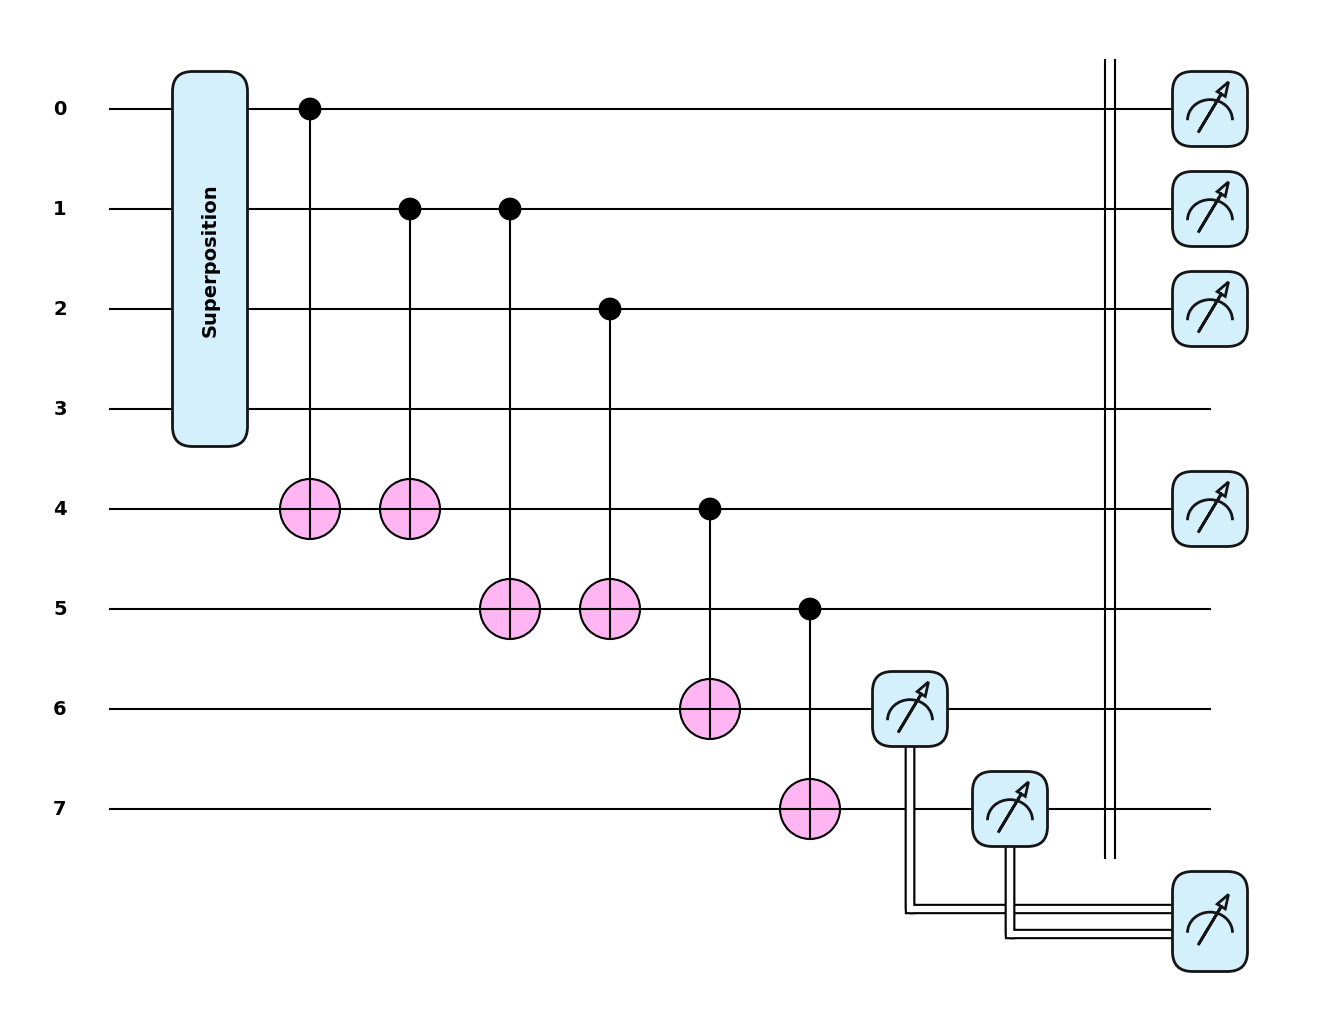

In [14]:
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2,3], work_wire=3)

    # parity
    qml.CNOT([0,4])
    qml.CNOT([1,4])
    qml.CNOT([1,5])
    qml.CNOT([2,5])
    
    # parity caopy to measure
    qml.CNOT([4,6])
    qml.CNOT([5,7])
    
    # measurement
    p_ab = qml.measure(6)
    p_bc = qml.measure(7)
    qml.Barrier(range(8))

    def p_ab_true():
        qml.measure(4, reset=True)
        qml.measure(5)
        qml.CNOT([0,4])

    def p_bc_true():
        qml.measure(4)
        qml.measure(5, reset=True)
        qml.CNOT([0,5])
        
    qml.cond((p_ab==1), p_ab_true, p_bc_true)

    return qml.probs(op=p_ab), qml.probs(op=p_bc), qml.density_matrix([0,1,2,4])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0],[0,0,1], [1,1,1]])
plt.show()

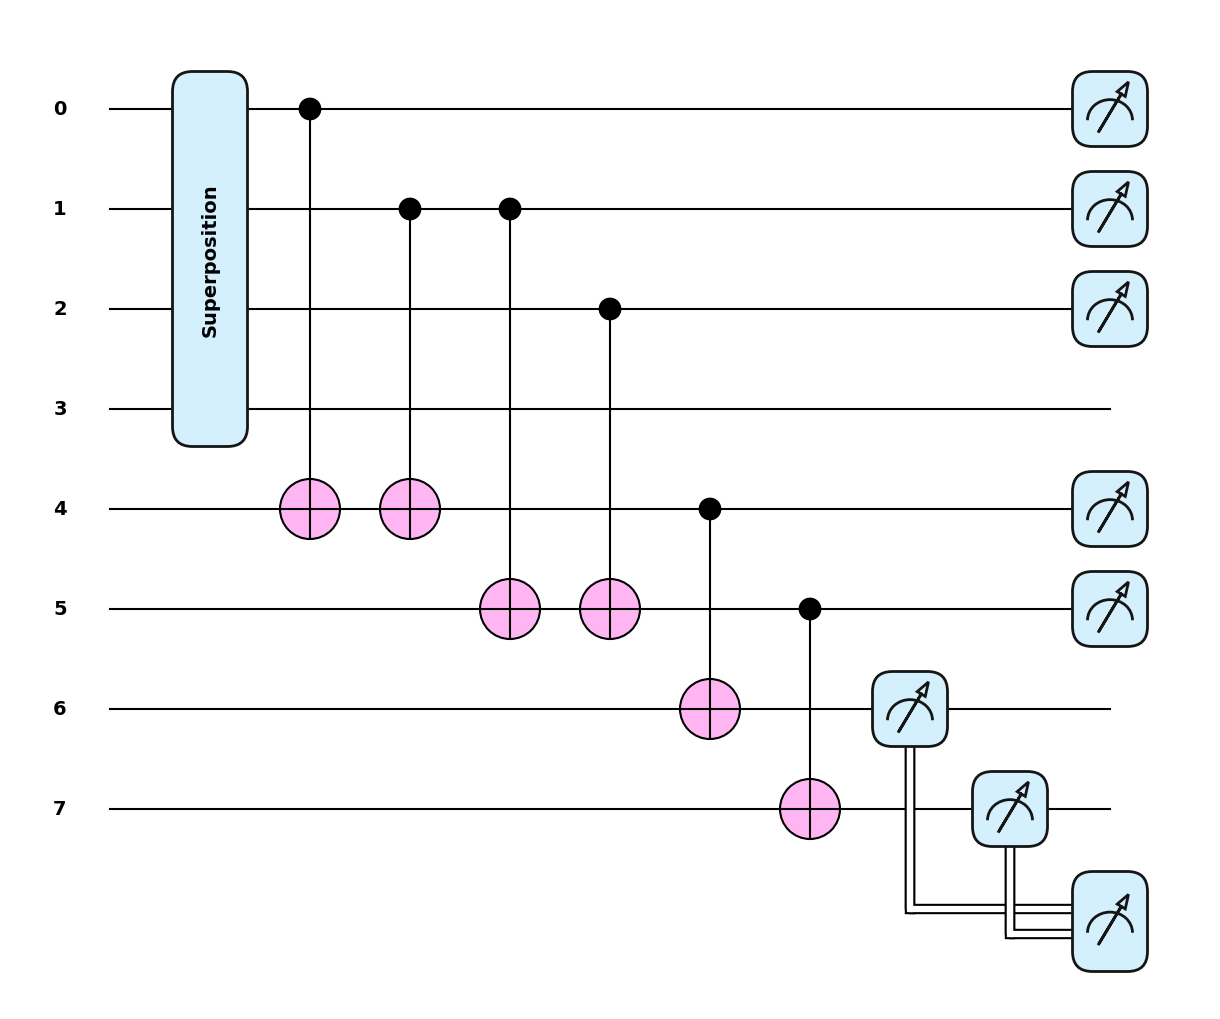

In [31]:
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2,3], work_wire=3)

    # parity
    qml.CNOT([0,4])
    qml.CNOT([1,4])
    qml.CNOT([1,5])
    qml.CNOT([2,5])
    
    # parity caopy to measure
    qml.CNOT([4,6])
    qml.CNOT([5,7])
    
    # measurement
    p_ab = qml.measure(6)
    p_bc = qml.measure(7)
    qml.Barrier(range(8))

    # qml.measure(4, reset=True)
    # qml.measure(5)    
    
    # take additional operations
    qml.CNOT([0,4])

    # qml.Barrier(range(8))/

    # qml.measure(4)
    # qml.measure(5, reset=True)    
    
    # take additional operations
    # qml.CNOT([0,5])

    return qml.probs(op=p_ab), qml.probs(op=p_bc), qml.density_matrix([0,1,2,4,5])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0],[0,0,1], [1,1,1]])
plt.show()

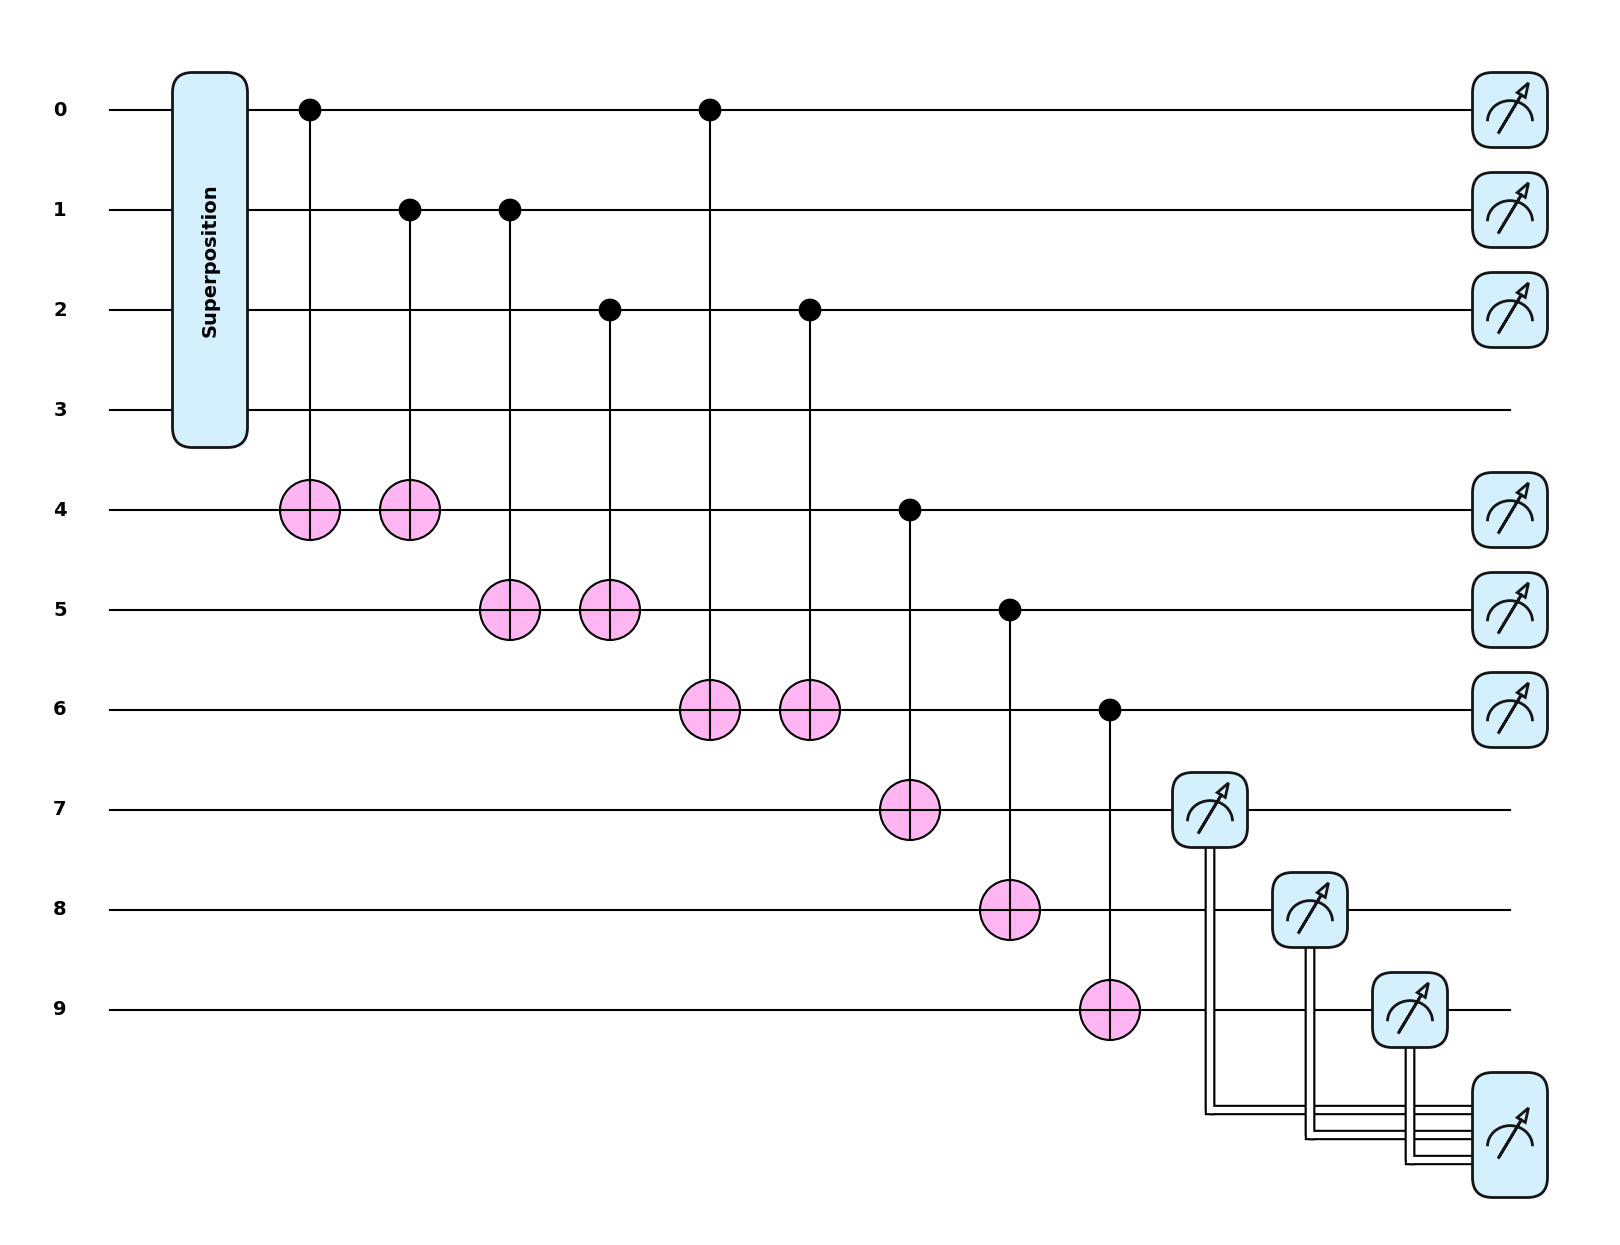

In [15]:
dev = qml.device('default.qubit', wires=9)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2,3], work_wire=3)

    # parity
    qml.CNOT([0,4])
    qml.CNOT([1,4])
    qml.CNOT([1,5])
    qml.CNOT([2,5])
    qml.CNOT([0,6])
    qml.CNOT([2,6])    
    
    # parity caopy to measure
    qml.CNOT([4,7])
    qml.CNOT([5,8])
    qml.CNOT([6,9])

    # measurement
    p_ab = qml.measure(7)
    p_bc = qml.measure(8)
    p_ac = qml.measure(9)
    # qml.Barrier(range(9))

    # # take additional operations
    # qml.CNOT([0,7])
    # qml.Barrier(range(9))
    # qml.CNOT([0,8])
    # qml.Barrier(range(9))
    # qml.CNOT([0,9])
    # qml.Barrier(range(9))
    return qml.probs(op=p_ab), qml.probs(op=p_bc), qml.probs(op=p_ac), qml.density_matrix([0,1,2,4,5,6])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0],[0,0,1], [1,1,1]])
plt.show()

In [17]:
fig.savefig('LE_3d_2idx.png')

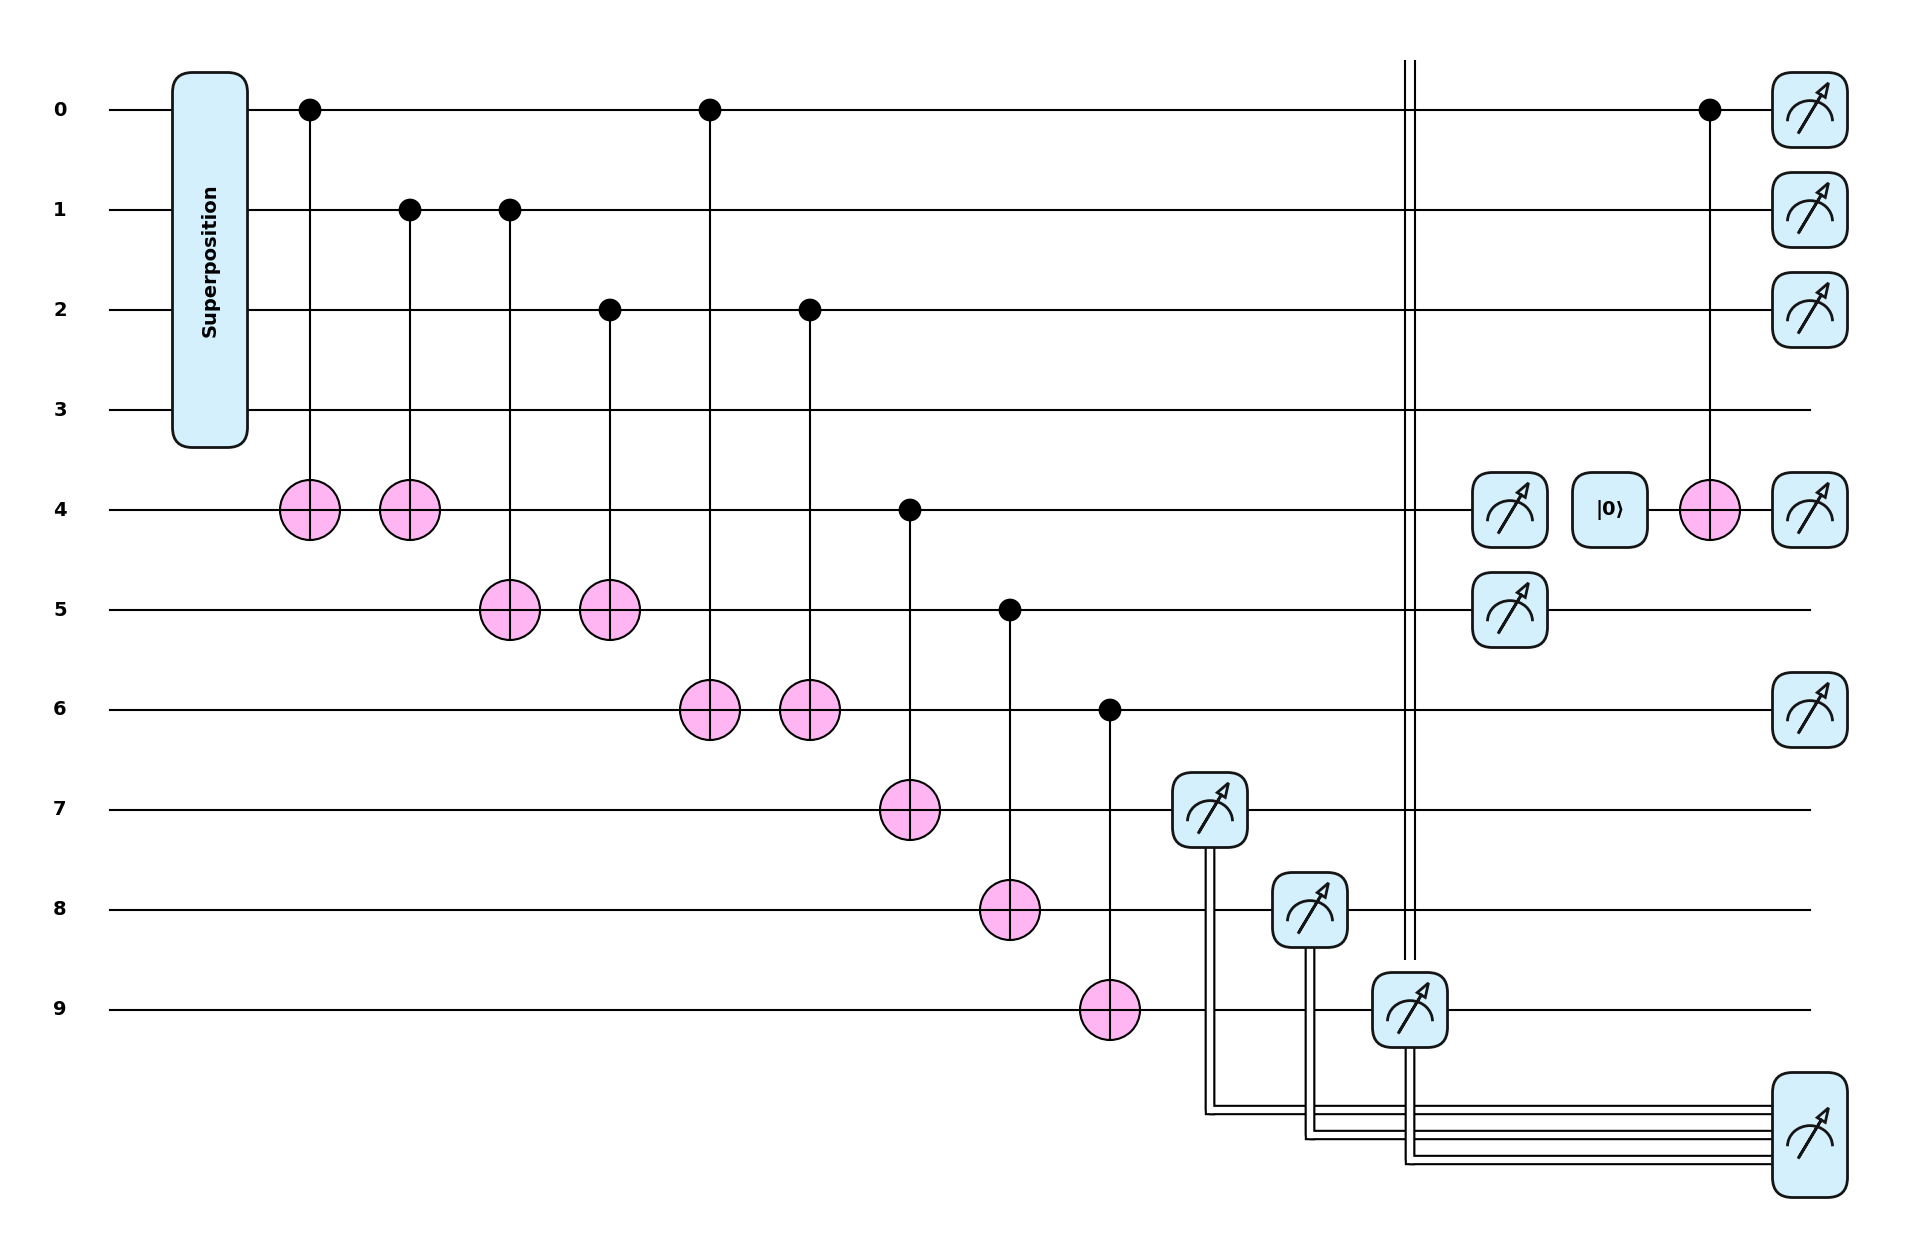

In [23]:
dev = qml.device('default.qubit', wires=9)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[0,1,2,3], work_wire=3)

    # parity
    qml.CNOT([0,4])
    qml.CNOT([1,4])
    qml.CNOT([1,5])
    qml.CNOT([2,5])
    qml.CNOT([0,6])
    qml.CNOT([2,6])    
    
    # parity caopy to measure
    qml.CNOT([4,7])
    qml.CNOT([5,8])
    qml.CNOT([6,9])

    # measurement
    p_ab = qml.measure(7)
    p_bc = qml.measure(8)
    p_ac = qml.measure(9)
    qml.Barrier(range(9))

    # copy first qubit
    pp_ab = qml.measure(4, reset=True)
    pp_bc = qml.measure(5)
    qml.CNOT([0,4])

    # # take additional operations
    # qml.CNOT([0,7])
    # qml.Barrier(range(9))
    # qml.CNOT([0,8])
    # qml.Barrier(range(9))
    # qml.CNOT([0,9])
    # qml.Barrier(range(9))
    return qml.probs(op=p_ab), qml.probs(op=p_bc), qml.probs(op=p_ac), qml.density_matrix([0,1,2,4,6])

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0],[0,0,1], [1,1,1]])
plt.show()

In [24]:
fig.savefig('LE_3d_2idx_ex1.png')